In [1]:
# !python /Users/kit/Documents/Phys_Working/LLM_SR/check_path.py

# import sys
# print("\nAdding project directory to Python path...")
# sys.path.insert(0, '/Users/kit/Documents/Phys_Working/LLM_SR')
# print(f"  - Added: {sys.path[0]}")

import llmlex
import openai

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:

api_key = os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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"
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=api_key,
)

# Raw Data

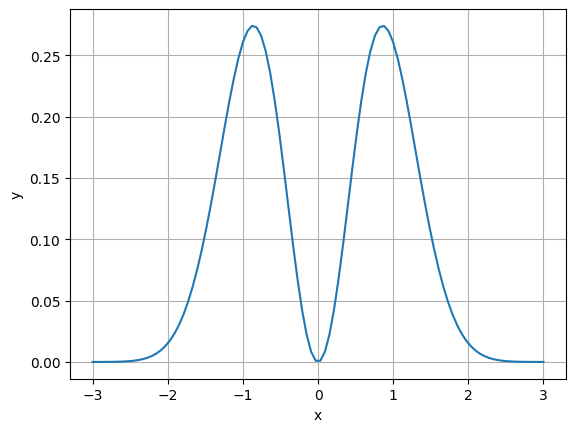

In [3]:
x = np.linspace(-3, 3, 100)
y = np.exp(-x**2)*np.sin(x)**2
#y = np.pi*np.ones(100)

plt.plot(x, y,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
#plt.legend()
plt.savefig('plot.png')

# Getting the Base64 string
base64_image = llmlex.images.encode_image('plot.png')

In [4]:
system_prompt = ("You are a symbolic regression expert. Analyze the data and provide an improved mathematical ansatz. "
                         "Respond with ONLY the ansatz formula, without any explanation or commentary. Ensure it is in valid python. You may use numpy functions. "
                         "params is a list of parameters that can be of any length or complexity. "
                        )


prompt = ("import numpy as np \n\n"
            f"# raw data:\n"
            f"x = {x}\n"
            f"y = {y}\n\n"
            "curve_0 = lambda x, *params: params[0]\n"
            "curve_1 = lambda x, *params: params[0]\n"
            "curve_2 = lambda x, *params:"
            )

chat = client.chat.completions.create(
                        model="openai/gpt-4o",
                        messages=[
                            {"role": "system", "content": system_prompt},
                            {
                                "role": "user",
                                "content": [
                                    {
                                        "type": "text",
                                        "text": prompt,
                                    },
                                ],
                            }
                        ],
                        max_tokens=4096,
                    )
response = chat.choices[0].message.content
print(response)

```python
curve_2 = lambda x, *params: params[0] * np.exp(-params[1] * x**2)
```


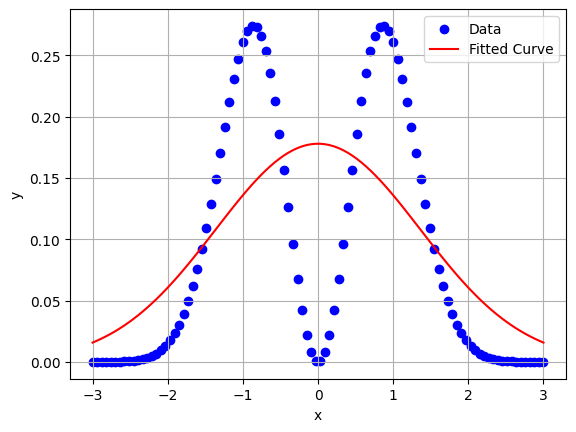

Optimized parameters: [0.17785534 0.26927988]


In [5]:

# Define the curve function
def curve_2(x, *params):
    return params[0] * np.exp(-params[1] * x**2.)

# Initial guess for the parameters
initial_guess = [1, 1]

# Fit the curve to the data
popt, pcov = curve_fit(curve_2, x, y, p0=initial_guess)

# Plot the original data
plt.scatter(x, y, label='Data', color='blue')

# Plot the fitted curve
plt.plot(x, curve_2(x, *popt), label='Fitted Curve', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized parameters:", popt)

# LLM_LEx compare

In [6]:
r = llmlex.single_call(client, base64_image, x, y, model="openai/gpt-4o",function_list=None, system_prompt=None)
print(r)

2025-04-14 10:57:47,224 - llmlex.llmlex - INFO - Extracted ansatz: params[0] * np.exp(-params[1] * (x - params[2])**2... with 6 parameters
2025-04-14 10:57:47,498 - llmlex.llmlex - INFO - Fit result: score=-0.07679154723882675, params=[ 0.27934705  3.18445541 -0.91685805  0.27934653  3.18443019  0.91685691]


{'params': array([ 0.27934705,  3.18445541, -0.91685805,  0.27934653,  3.18443019,
        0.91685691]), 'score': -0.07679154723882675, 'ansatz': 'params[0] * np.exp(-params[1] * (x - params[2])**2) + params[3] * np.exp(-params[4] * (x - params[5])**2)', 'Num_params': 6, 'response': ChatCompletion(id='gen-1744642663-dt1sk5pjsu7znkSQvm5w', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```python\ncurve_1 = lambda x, *params: params[0] * np.exp(-params[1] * (x - params[2])**2) + params[3] * np.exp(-params[4] * (x - params[5])**2)\n```', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, reasoning=None), native_finish_reason='stop')], created=1744642663, model='openai/gpt-4o', object='chat.completion', service_tier=None, system_fingerprint='fp_b7faba9ef5', usage=CompletionUsage(completion_tokens=62, prompt_tokens=530, total_tokens=592, completion_tokens_details=CompletionTokensDetails(accepted_prediction_t

/var/folders/b6/m5qrk7z12lxb7lpygv99mnmw0000gn/T/ipykernel_8347/4265620101.py:3: RuntimeWarning: overflow encountered in exp
  return params[0] * np.exp(-params[1] * (x - params[2])**2) + params[3] * np.exp(-params[4] * (x - params[5])**2)


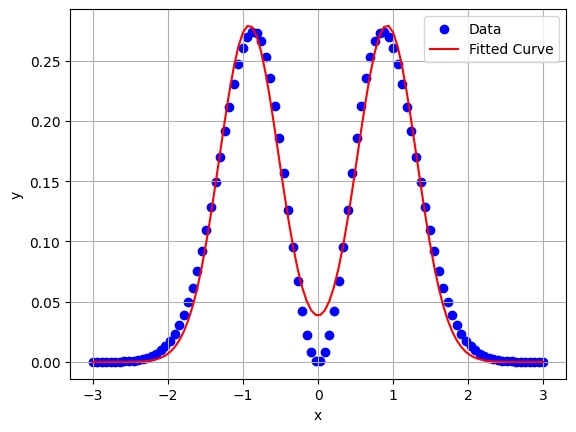

Optimized parameters: [ 0.27934705  3.18445541 -0.91685805  0.27934653  3.18443019  0.91685691]


In [7]:

# Define the curve function
def curve_2(x, *params):
    return params[0] * np.exp(-params[1] * (x - params[2])**2) + params[3] * np.exp(-params[4] * (x - params[5])**2)

# Initial guess for the parameters
initial_guess = [1, 1, 1, 1, 1, 1]

# Fit the curve to the data
popt, pcov = curve_fit(curve_2, x, y, p0=initial_guess)

# Plot the original data
plt.scatter(x, y, label='Data', color='blue')

# Plot the fitted curve
plt.plot(x, curve_2(x, *popt), label='Fitted Curve', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized parameters:", popt)